In [1]:
#import required library
#These lines import the required Python libraries for our analysis:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Load the data from the CSV file
stock_price = pd.read_csv("test_csv.csv")


In [3]:
# Convert 'Dates' column to datetime format
stock_price['Dates'] = pd.to_datetime(stock_price['Dates'], format='%d/%m/%Y')


In [4]:
# Split the data into features (X) and target (y)
X = stock_price[['Dates']]
y = stock_price['BARC LN Equity']

In [5]:
# Split the data into training, validation, and test sets
#This line splits the data into training and test sets using the train_test_split function from scikit-learn. 
#The X and y variables contain the feature matrix and target variable, respectively. 
#The test_size=0.2 argument specifies that 20% of the data should be used for testing, and the remaining 80% for training. 
#The random_state=42 argument ensures reproducibility by setting a fixed seed for the random number generator.
#The function returns four variables: X_train, X_test, y_train, and y_test, which contain the feature matrices and target variables for the training and test sets, respectively.



X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



In [6]:
# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Make predictions on the training, validation, and test sets
#These lines use the fitted randomforest model to make predictions on the training and test sets using the predict method. 
#The predicted values for the training set are stored in y_train_pred, and the predicted values for the test set are stored in y_test_pred.


y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

In [8]:
r2_train = r2_score(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)


# Calculate evaluation metrics on the validation set
r2_val = r2_score(y_val, y_val_pred)
explained_variance_val = explained_variance_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mae_val = mean_absolute_error(y_val, y_val_pred)


# Calculate evaluation metrics on the test set
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

In [9]:
#These lines print the calculated evaluation metrics for both the training and test sets. The f-strings are used to format the output with the metric names and values.



print("Training Set Metrics:")
print(f"\nR-squared: {r2_train:.2f}")
print(f"Explained Variation: {explained_variance_train:.2f}")
print(f"MAPE: {mape_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")


print("\nValidation Set Metrics:")
print(f"\nR-squared: {r2_val:.2f}")
print(f"Explained Variation: {explained_variance_val:.2f}")
print(f"MAPE: {mape_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"MAE: {mae_val:.2f}")


print("\nTest Set Metrics:")

print(f"\nR-squared: {r2_test:.2f}")
print(f"Explained Variation: {explained_variance_test:.2f}")
print(f"MAPE: {mape_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")

Training Set Metrics:

R-squared: 1.00
Explained Variation: 1.00
MAPE: 0.01
MSE: 0.00
RMSE: 0.01
MAE: 0.01

Validation Set Metrics:

R-squared: 0.99
Explained Variation: 0.99
MAPE: 0.02
MSE: 0.00
RMSE: 0.03
MAE: 0.02

Test Set Metrics:

R-squared: 0.99
Explained Variation: 0.99
MAPE: 0.02
MSE: 0.00
RMSE: 0.03
MAE: 0.02


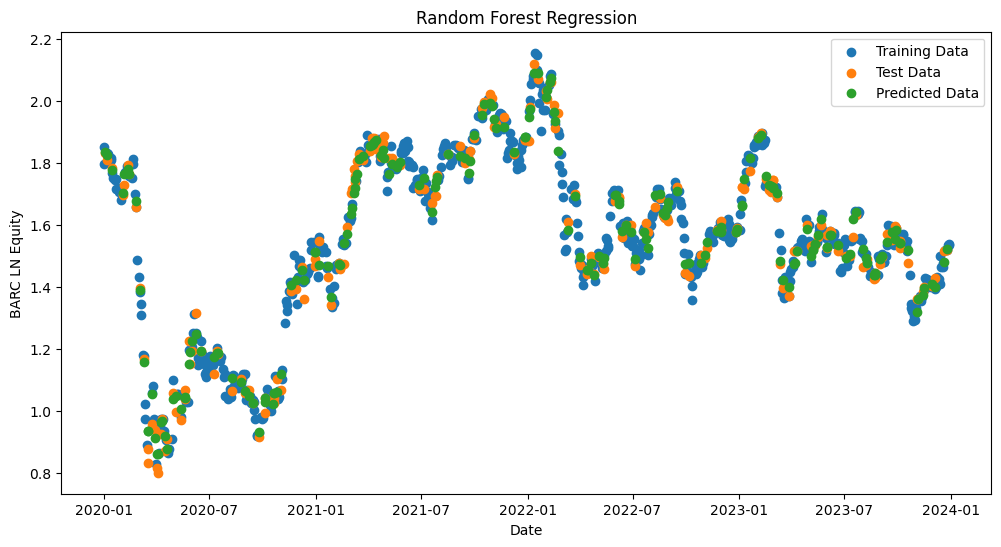

In [11]:
##### Plot the training and test data with the trained model
#These lines create a plot using Matplotlib to visualize the training and test data along with the trained linear regression model:

#plt.figure(figsize=(12, 6)) creates a new figure with a specific size (12 inches wide and 6 inches tall).
#plt.scatter(X_train, y_train, label='Training Data', alpha=0.3) plots the training data as scattered points, with a label and transparency level (alpha=0.3).
#plt.scatter(X_test, y_test, label='Test Data', alpha=0.3) plots the test data as scattered points, with a label and transparency level (alpha=0.3).



plt.figure(figsize=(12, 6))
plt.scatter(X_train['Dates'], y_train, label='Training Data')
plt.scatter(X_test['Dates'], y_test, label='Test Data')
plt.scatter(X_test['Dates'], y_test_pred, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('BARC LN Equity')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

This image is a scatter plot showing the performance of a Random Forest Regression model. The plot displays three different sets of data points: Training Data, Test Data, and Predicted Data.

On the x-axis, the plot is showing dates ranging from 2020-01 to 2024-01, which likely represents the time period for the data used in the model. The y-axis represents a numerical value, possibly a stock price or some other financial metric, ranging from around 0.8 to 2.2.

The green dots represent the Training Data used to train the Random Forest Regression model. The blue dots represent the Test Data, which is a separate set of data used to evaluate the performance of the trained model. The orange dots represent the Predicted Data, which are the values predicted by the Random Forest Regression model.

By visually inspecting the plot, we can observe that the Predicted Data points (orange dots) generally follow the overall trend of the Training Data (green dots) and Test Data (blue dots), indicating that the Random Forest Regression model has captured the underlying patterns in the data reasonably well.

However, there are some deviations between the Predicted Data and the actual Training/Test Data, which is expected since no model can perfectly predict all the variations in the data.

Overall, this plot provides a visual representation of how well the Random Forest Regression model is performing in predicting the target((likely a sial metric) based on the inpuvariables).